<a href="https://colab.research.google.com/github/hersan19/EMC_2021/blob/main/Ejemplo_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install deap

In [3]:
import array
import random
import json
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import numpy as np

In [14]:

    
import math
def Euclidian(X, Y):
    return math.sqrt( (float(X[1])-float(Y[1]))**2 + (float(X[0])-float(Y[0]))**2)
    
def Distances(cities):
    r= len(cities)
    M=np.zeros((r,r))
    for i in range(r-1):
        for j in range(i+1, r):
            M[i][j] = Euclidian(cities[i], cities[j])
            M[j][i]= M[i][j]
    return M


url="https://raw.githubusercontent.com/hersan19/EMC_2021/main/ciudades.csv?token=AMUQEUUNCZHPLVM2N6WHX5DBBKZ4S"
df_ciudades=pd.read_csv(url)
datas = list(zip(list(df_ciudades.latitud), list(df_ciudades.longitud)))

distance_map =Distances(datas)
IND_SIZE = len(datas)

  


creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)




def main():
    #random.seed(0)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop,log=algorithms.eaSimple(pop, toolbox, 0.8, 0.1, 100, stats=stats, 
                        halloffame=hof,verbose=True)
    
    return pop, log,hof

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning:

A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



In [15]:
pop,estadisticas,mejor=main()

gen	nevals	avg    	std    	min    	max    
0  	100   	258.644	19.1729	215.286	310.968
1  	80    	248.607	20.7038	190.552	296.987
2  	75    	241.287	20.2386	190.552	283.865
3  	87    	239.154	21.8051	184.848	288.028
4  	87    	238.411	22.2584	178.299	290.417
5  	89    	237.887	23.3496	181.81 	296.819
6  	75    	230.784	21.6025	180.731	285.246
7  	88    	233.946	25.6943	183.894	291.408
8  	76    	228.394	25.4294	177.58 	287.966
9  	84    	229.522	26.5789	177.58 	289.403
10 	79    	221.552	23.4601	173.36 	274.475
11 	83    	219.593	26.9367	173.36 	278.915
12 	84    	221.393	28.6007	173.36 	278.925
13 	89    	216.161	24.8991	170.862	275.904
14 	87    	216.78 	27.2544	173.36 	291.88 
15 	88    	214.87 	25.519 	173.429	276.157
16 	85    	215.545	27.7643	158.177	282.06 
17 	94    	215.293	28.514 	174.231	276.386
18 	83    	206.735	27.7676	172.656	280.159
19 	86    	208.27 	29.417 	166.436	291.1  
20 	70    	202.471	28.7017	166.436	272.92 
21 	88    	203.079	31.5721	162.379	274.879
22 	79    	

In [16]:
recorrido=[]
for i in range(32):
  latitud=df_ciudades.iloc[mejor[0][i]]["latitud"]
  longitud=df_ciudades.iloc[mejor[0][i]]["longitud"]
  recorrido.append((latitud,longitud))

In [17]:
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scattergeo(
    #locations = ["Mexico"],
    #locationmode = 'country names',
    lon=df_ciudades["longitud"],
    lat=df_ciudades["latitud"],
    hoverinfo="text",
    text=df_ciudades["ciudad"],
    mode="markers",
    marker = dict(size=2,color='rgb(255,0,0)',line=dict(width=3,color='rgba(68,68,0)'))))

for i in range(31):
  fig.add_trace(go.Scattergeo(
      lat=[recorrido[i][0],recorrido[i+1][0]],
      lon=[recorrido[i][1],recorrido[i+1][1]],
      mode="lines",
      line=dict(width=1,color="blue"),
  ))
fig.add_trace(go.Scattergeo(
    lat=[recorrido[-1][0],recorrido[0][0]],
    lon=[recorrido[-1][1],recorrido[0][1]],
    mode="lines",
    line=dict(width=1,color="blue"),
  ))

fig.update_layout(title_text="Mejor recorrido",showlegend=False,
                  geo =dict(
                      #showcountries=True,
                      scope="north america",
                      projection_type ='conic equal area',                      
                      showland = True,
                      #landcolor='rgb(243,243,243)',
                      #countrycolor='rgb(204,204,204)',
                  ), width=1800, height=1400)
fig.show()

Mejor individuo es: Individual('i', [3, 29, 28, 16, 14, 10, 11, 7, 17, 2, 24, 6, 18, 4, 1, 25, 8, 13, 31, 0, 9, 21, 27, 23, 12, 15, 5, 19, 20, 26, 22, 30])
con aptitud de : (116.15369442122902,)


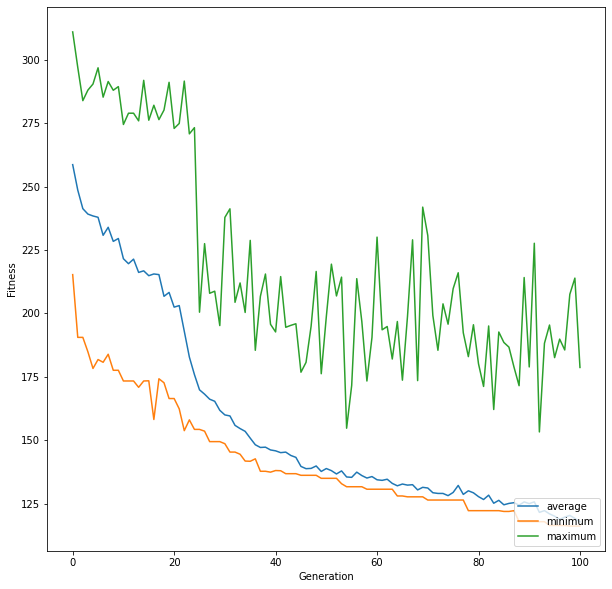

In [18]:
print("Mejor individuo es: %s\ncon aptitud de : %s" % (mejor[0], mejor[0].fitness))
    
import matplotlib.pyplot as plt
gen, avg, min_, max_ = estadisticas.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="lower right")


plt.rcParams["figure.figsize"] = (10,10)
plt.show()
